**Clustering**<br>

**Problem Statement**<br>

Perform clustering for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained. Refer to EastWestAirlines.xlsx dataset.

CRISP-ML(Q) process model describes six phases:<br>


Business and Data Understanding<br>
Data Preparation<br>
Model Building<br>
Model Evaluation<br>
Deployment<br>
Monitoring and Maintenance<br>



Objective(s): Maximize the Customers<br>

Constraints: Minimize the brain drain

In [1]:
pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.0/290.0 KB 5.9 MB/s eta 0:00:00


In [2]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 73.6 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [47]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp38-cp38-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.0
    Uninstalling matplotlib-3.6.0:
      Successfully uninstalled matplotlib-3.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dtale 2.9.1 requires matplotlib==3.6.0; python_version == "3.8", but you have matplotlib 3.1.3 which is incompatible.


In [4]:
#importing required packages
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from feature_engine.outliers import Winsorizer

In [5]:
#import the data
df=pd.read_excel('/content/EastWestAirlines.xlsx')

In [6]:
df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
df.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [10]:
'''
EXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS
1st Moment Business Decision (Measures of Central Tendency)

1) Mean

2) Median

3) Mode
'''

'\nEXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS\n1st Moment Business Decision (Measures of Central Tendency)\n\n1) Mean\n\n2) Median\n\n3) Mode\n'

In [12]:
print("Mean\n")
print(df.mean())
print("\nMedian\n")
print(df.median())
print("\nMode\n")
print(df.mode())

Mean

ID                    2014.819455
Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award?                   0.370343
dtype: float64

Median

ID                    2016.0
Balance              43097.0
Qual_miles               0.0
cc1_miles                1.0
cc2_miles                1.0
cc3_miles                1.0
Bonus_miles           7171.0
Bonus_trans             12.0
Flight_miles_12mo        0.0
Flight_trans_12          0.0
Days_since_enroll     4096.0
Award?                   0.0
dtype: float64

Mode

        ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1   1000.0         0.0        1.0        1.0        1.0          0.0   
1        2      NaN         Na

In [13]:
"""
2nd Moment Business Decision (Measures of Dispersion)

1) Variance

2) Standard deviation

3) Range (maximum - minimum)
"""

'\n2nd Moment Business Decision (Measures of Dispersion)\n\n1) Variance\n\n2) Standard deviation\n\n3) Range (maximum - minimum)\n'

In [14]:
print("\n Variance \n")
print(df.var())
print("\n Standard Deviation\n")
print(df.std())


 Variance 

ID                   1.347374e+06
Balance              1.015573e+10
Qual_miles           5.985557e+05
cc1_miles            1.895907e+00
cc2_miles            2.180060e-02
cc3_miles            3.811896e-02
Bonus_miles          5.832692e+08
Bonus_trans          9.223317e+01
Flight_miles_12mo    1.960586e+06
Flight_trans_12      1.438816e+01
Days_since_enroll    4.264781e+06
Award?               2.332473e-01
dtype: float64

 Standard Deviation

ID                     1160.764358
Balance              100775.664958
Qual_miles              773.663804
cc1_miles                 1.376919
cc2_miles                 0.147650
cc3_miles                 0.195241
Bonus_miles           24150.967826
Bonus_trans               9.603810
Flight_miles_12mo      1400.209171
Flight_trans_12           3.793172
Days_since_enroll      2065.134540
Award?                    0.482957
dtype: float64


In [15]:
"""
3rd Business Moment Decision (Skewness)

Measure of asymmetry in the data distribution
"""

'\n3rd Business Moment Decision (Skewness)\n\nMeasure of asymmetry in the data distribution\n'

In [16]:
print("Skewness\n")
df.skew()

Skewness



ID                   -0.003343
Balance               5.004187
Qual_miles            7.512395
cc1_miles             0.857569
cc2_miles            11.210459
cc3_miles            17.195532
Bonus_miles           2.842093
Bonus_trans           1.157362
Flight_miles_12mo     7.451666
Flight_trans_12       5.490461
Days_since_enroll     0.120174
Award?                0.537200
dtype: float64

In [17]:
"""
4th Business Moment Decision (Kurtosis)

Measure of peakedness - represents the overall spread in the data
"""

'\n4th Business Moment Decision (Kurtosis)\n\nMeasure of peakedness - represents the overall spread in the data\n'

In [18]:
print("Kurtosis\n")
df.kurt()

Kurtosis



ID                    -1.199648
Balance               44.157932
Qual_miles            67.689351
cc1_miles             -0.748508
cc2_miles            133.786489
cc3_miles            308.654728
Bonus_miles           13.630489
Bonus_trans            2.745737
Flight_miles_12mo     94.761019
Flight_trans_12       42.978152
Days_since_enroll     -0.967505
Award?                -1.712272
dtype: float64

In [19]:
"""
Cleaning Unwanted columns
ID column is not needed for analysis purpose.
"""

'\nCleaning Unwanted columns\nID column is not needed for analysis purpose.\n'

In [20]:
df.drop(['ID'], axis = 1, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [22]:
"""
Handling duplicates:


"""

'\nHandling duplicates:\n\n\n'

In [23]:
duplicate=df.duplicated()
sum(duplicate)

1

In [24]:
#Removing duplicated row
df=df.drop_duplicates()

In [25]:
"""
Missing Value Analysis
"""

'\nMissing Value Analysis\n'

In [26]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [27]:
"""
From above observation there is no null value in dataset
"""

'\nFrom above observation there is no null value in dataset\n'

In [48]:
"""
Outliers Analysis
"""

'\nOutliers Analysis\n'

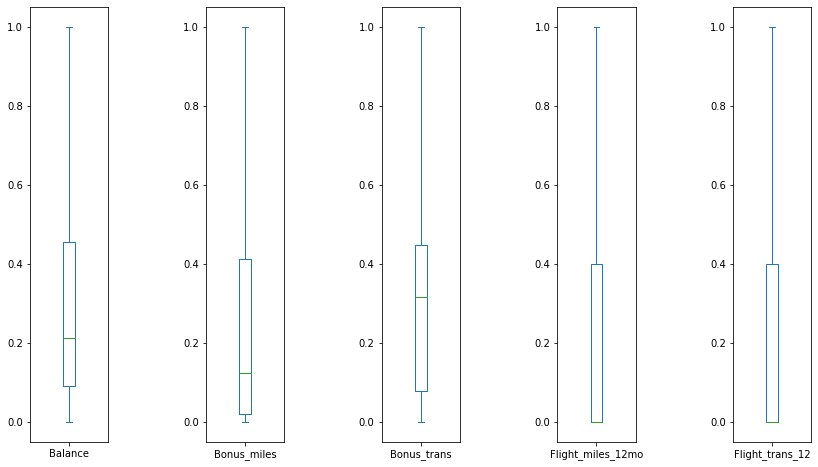

In [49]:
df.plot(kind = 'box', subplots = True, sharey = False, figsize = (14, 8)) 
plt.subplots_adjust(wspace = 1.25) 
plt.show()  

In [50]:
#Outlier treatment
winsor = Winsorizer(capping_method='iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Balance','Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12'])

df = winsor.fit_transform(df[['Balance','Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12']])

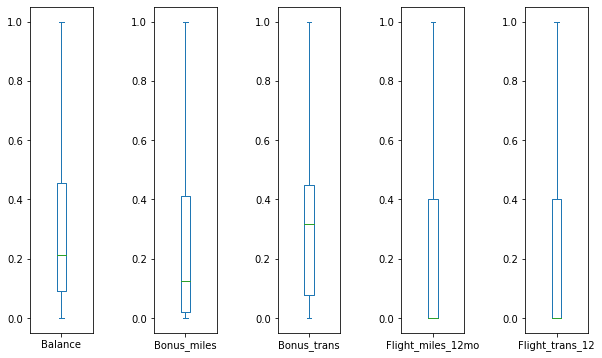

In [51]:
#Verify for outliers post the treatment
df.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6)) 
plt.subplots_adjust(wspace = 0.97) 
plt.show() 

In [52]:
#Zero and near zero variance
df.var()

Balance              0.083360
Bonus_miles          0.098344
Bonus_trans          0.057530
Flight_miles_12mo    0.143131
Flight_trans_12      0.142853
dtype: float64

In [53]:
#Graphical representation

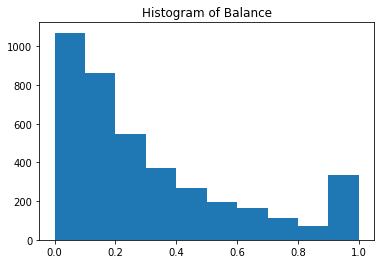

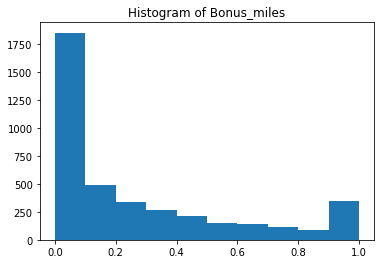

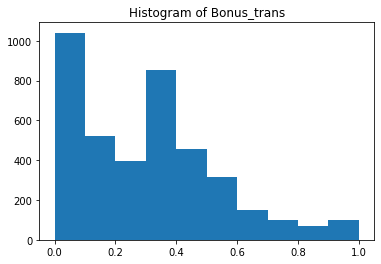

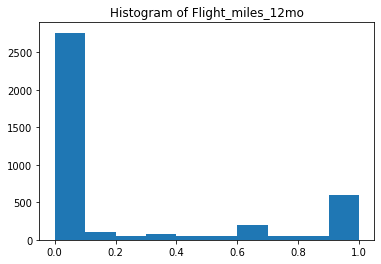

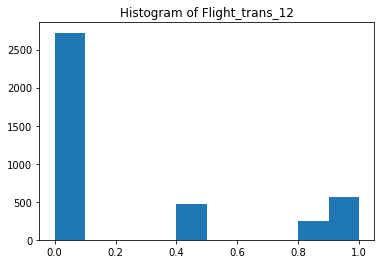

In [54]:
# Histogram describes the spread of data

for i in df.columns:
  plt.hist(x = df[i])
  plt.title("Histogram of " + str(i))
  plt.show()

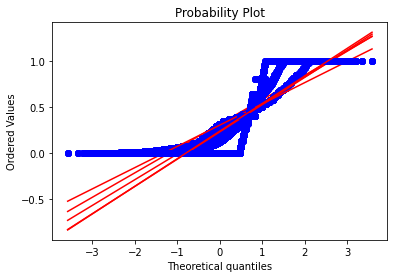

In [55]:
# Normal Quantile-Quantile Plot - Helps in understanding the distribution of the data - Normal distribution or not
import scipy.stats as stats
import pylab

# Checking Whether data is normally distributed
for i in df.columns:
  stats.probplot(df[i], dist = "norm", plot = pylab)

In [56]:
#Bivariate Analysis
#Scatter Plot

In [ ]:
sns.pairplot(df)   # Use numerical variables for scatter plots

In [ ]:
#Scaling using Normalization:

In [ ]:
def norm_func(i):
  x = (i-i.min()) / (i.max()-i.min())
  return(x)

In [ ]:
df = norm_func(df)

In [ ]:
df.describe()

In [ ]:
'''
CLUSTERING MODEL BUILDING

'''

In [ ]:
# Libraries for creating scree plot or elbow curve 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    TWSS.append(kmeans.inertia_)

TWSS

Text(0, 0.5, 'total_within_SS')

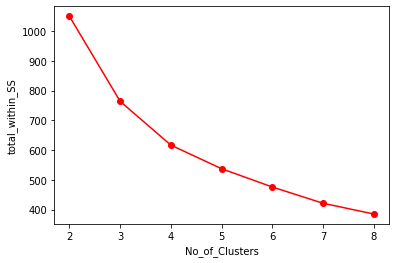

In [68]:
#Creating a scree plot to find out no.of cluster
plt.plot(k, TWSS, 'ro-')
plt.xlabel("No_of_Clusters")
plt.ylabel("total_within_SS")

In [69]:
#Detecting the best k=4 using TWSS value from scree plot

In [70]:
model = KMeans(n_clusters = 4)
yy = model.fit(df)

In [71]:
model.labels_

array([0, 0, 0, ..., 3, 2, 0], dtype=int32)

In [72]:
mb = pd.Series(model.labels_) 

In [73]:
df['clust'] = mb # creating a  new column and assigning it to new column 
df.head()

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,clust
0,0.138491,0.003018,0.026316,0.0,0.0,0.0
1,0.094700,0.003729,0.052632,0.0,0.0,0.0
2,0.203503,0.071515,0.105263,0.0,0.0,0.0
3,0.072713,0.008673,0.026316,0.0,0.0,0.0
4,0.481037,0.751060,0.684211,1.0,1.0,1.0


In [79]:
df.loc[3998:]

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,clust
3998,0.014842,0.0,0.0,0.0,0.0,NaN


In [80]:
df.fillna(df.mean(), inplace = True)

In [74]:
#Evaluation of Number of Clusters using Silhouette Coefficient Technique

In [81]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range (2, 11):
    kmeans = KMeans(n_clusters = k, init = "random", random_state = 1)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    k = k
    Sil_coff = score
    silhouette_coefficients.append([k, Sil_coff])

In [82]:
silhouette_coefficients

[[2, 0.6485508604252255],
 [3, 0.6866261046271611],
 [4, 0.6943514416198336],
 [5, 0.49420117092217086],
 [6, 0.4074934057287096],
 [7, 0.3753540315585883],
 [8, 0.3846409807951617],
 [9, 0.3580489266220216],
 [10, 0.35983481476699397]]

In [83]:
#Shilhouette Coeffficients shows, the number of clusters k = 4 as the best value